# General Expressions for Acid-Base Titrations of Arbitrary Mixtures

A notebook based on the work presented in http://doi.org/10/cs2788 for the degree of protonation for arbitrary polyprotic acids.

The mole fraction of each species is given by the expression,

$$
\chi_{H_mA} = \frac{[H]^m K_1 K_2 ... K_{n-m} }
{[H]^n + [H]^{n-1}K_1 + [H]^{n-2}K_1K_2 + ... + K_1K_2...K_n}
$$
where $m = 1, 2, ... n$ are indices of each of the $n$ equilibrium constants. 

 o-phosphate: pH = 9, Z = -1.98
     citrate: pH = 9, Z = -3.00
        STPP: pH = 9, Z = -4.76
         SPP: pH = 9, Z = -3.32


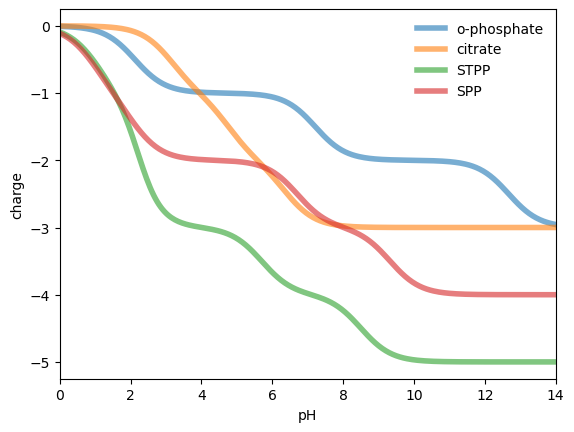

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Here you may add poly-protic acids, their binding constants, as well
# as their charge in the fully de-protonated form.
data = {
    'o-phosphate' : dict(Z=-3, pK=np.array( [ 2.12, 7.21, 12.67 ] ) ),
    'citrate' : dict(Z=-3, pK=np.array( [3.13, 4.76, 6.39] ) ),
    'STPP' : dict(Z=-5, pK=np.array( [ 1.0, 2.2, 2.3, 5.7, 8.5 ] ) ),
    'SPP' : dict(Z=-4, pK = np.array( [ 0.91, 2.1, 6.7, 9.32 ] ) )
}

pHrange = np.arange(0, 14, 0.05) # pH range to plot

def xhi(m, pH, pK):
    """
    Degree of protonation for the m'th specie (Eq. 23 in doi:10/cs2788)
    
    Parameters
    ----------
    m : number
        The species index to calculate the degree of protonation for. Starting at 0.
    pH : value
        The pH value
    pK : array-like
        Array of acid-dissociation constants
        
    Returns
    -------
    value
        The degree of protonation for species m
    """
    n = len(pK)
    assert (n > 0) & (m < n)
    H = 10.0**(-pH)
    K = 10.0**(-pK)
    upper = H**m * K[0:n-m].prod()
    lower = H**n + sum([H**(n-(i+1)) * K[0:i+1].prod() for i in range(n)])    
    return upper / lower

for name, d in data.items():
    Zrange = []
    for pH in pHrange:
        valence = d['Z'] # charge of fully deprotonated state
        pK = d['pK']
        Z = 0
        for m in np.arange( len(pK) ):
            Z = Z + valence * xhi(m, pH, pK)
            valence = valence + 1.0
        if pH==9:
            print('%12s: pH = %1.0f, Z = %.2f' % (name, pH, Z))
        Zrange.append(Z)
    plt.plot(pHrange, Zrange, label=name, lw=4, alpha=0.6)
    
plt.xlabel('pH')
plt.ylabel('charge')
plt.xlim(0,14)
plt.legend(frameon=False, loc=0)
plt.show()

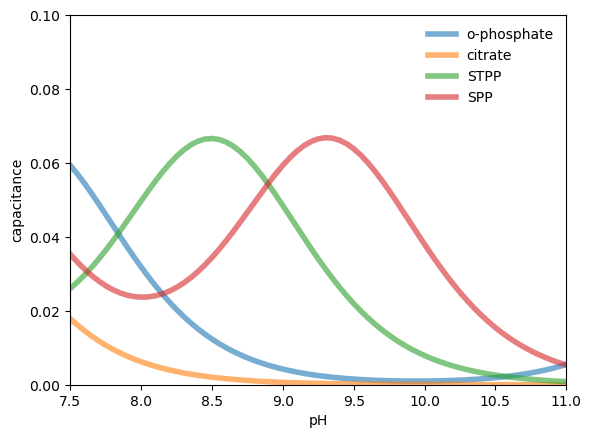

In [2]:
for name, d in data.items():
    Zrange = []
    for pH in pHrange:
        valence = d['Z']
        pK = d['pK']
        Z = 0
        for m in np.arange( len(pK) ):
            Z = Z + valence * xhi(m, pH, pK)
            valence = valence + 1.0
        Zrange.append(Z)
    plt.plot(pHrange, -np.gradient(Zrange)*np.log(10), label=name, lw=4, alpha=0.6)
    
plt.xlabel('pH')
plt.ylabel('capacitance')
plt.xlim(7.5,11)
plt.ylim(0, 0.1)
plt.legend(frameon=False, loc=0)
plt.show()